In [99]:
# accuracy, mse, mae, best fit line, save model using আচার & joblib

In [100]:
# import -> read excel -> input train data -> train using LR -> predict ->
# import predicted result in main excel -> find accuracy -> find error ->
# visualize best fit line -> save model

In [101]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import r2_score as accuracy
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
import pickle as pk
import joblib as jb

In [102]:
dataset = pd.read_excel("Height-Width.xlsx")

## Data Analysis

In [103]:
dataset.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


# Prediction

In [104]:
x = dataset[["Height"]]
y = dataset[["Weight"]]

In [105]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=.3, random_state=10)

In [106]:
xtrain.head(), xtest.head(), ytrain.head(), ytest.head()

(         Height
 2820  73.229116
 1745  67.456272
 945   69.549511
 881   65.718179
 675   64.506210,
          Height
 1353  67.017486
 1264  70.772165
 1285  68.073849
 188   65.755499
 1739  69.762879,
           Weight
 2820  210.545970
 1745  166.390656
 945   199.193815
 881   155.175543
 675   164.500367,
           Weight
 1353  183.381298
 1264  204.439540
 1285  185.533758
 188   179.855690
 1739  189.828313)

#### Linear Regression

In [107]:
reg = lr()

In [108]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [109]:
pred = reg.predict(xtest)
pred

array([[174.53790157],
       [196.92732109],
       [180.83706985],
       ...,
       [201.29850235],
       [217.79720601],
       [188.63167465]])

In [110]:
dataset["Predicted Weight"] = reg.predict(x)

In [111]:
dataset

,Height,Weight,Predicted Weight
0,73.847017,241.893563,215.262890
1,68.781904,162.310473,185.059253
2,74.110105,212.740856,216.831705
3,71.730978,220.042470,202.644798
4,69.881796,206.349801,191.617988
...,...,...,...
3496,69.296830,185.649086,188.129794
3497,70.542201,210.198845,195.556034
3498,73.912549,202.429960,215.653663
3499,67.396021,144.277671,176.795130


# Accuracy

In [112]:
accuracy(ytest, pred)

0.7328315355589521

# Error

In [113]:
mae(ytest, pred)

8.00779534151491

In [114]:
mse(ytest, pred)

107.67105202655728

# Best Fit Line

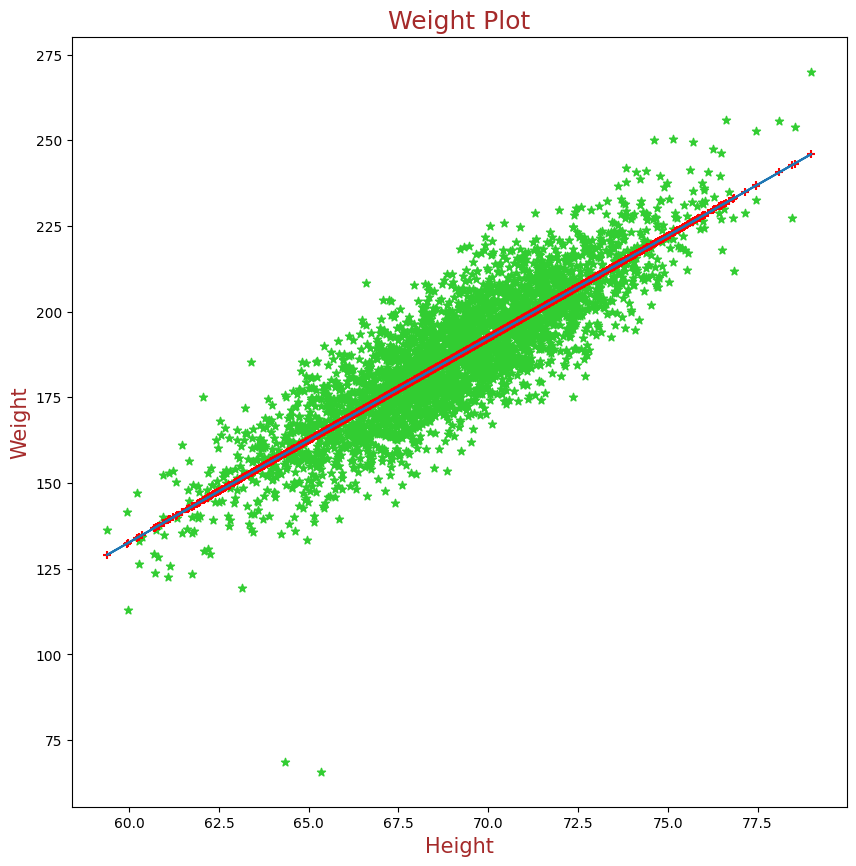

In [115]:
plt.figure(figsize=(10,10))
plt.scatter(dataset.Height, dataset.Weight, marker="*", color="#32CD32")
plt.xlabel("Height", color="brown", size="15")
plt.ylabel("Weight", color="brown", size="15")
plt.title("Weight Plot", color="brown", size="18")
plt.plot(x, reg.predict(x)) #line 71
plt.scatter(x, reg.predict(x), color="red", marker="+")

# Saving the Model

#### using আচার

In [122]:
import warnings
warnings.filterwarnings("ignore")
pk.dump(reg, open("pickle save", "wb"))
reg2 = pk.load(open("pickle save", "rb"))
reg2.predict([[73]])

array([[210.21206619]])

#### using joblib

In [120]:
jb.dump(reg, "joblib save")

['joblib save']